In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df = hr.drop_duplicates().reset_index(drop=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df[df.duplicated() == True]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

###Основные статистики для переменных

In [6]:
df.describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.median()

<ipython-input-7-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


satisfaction_level         0.66
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [8]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.74,0.55,4.0,149,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


###Сколько сотрудников работает в каждом департаменте

In [9]:
df['department'].value_counts()         

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

###Распределение сотрудников по зарплатам

In [10]:
salaries = df['salary'].value_counts()
salaries

low       5740
medium    5261
high       990
Name: salary, dtype: int64

<Axes: title={'center': 'Распределение сотрудников по зарплатам'}>

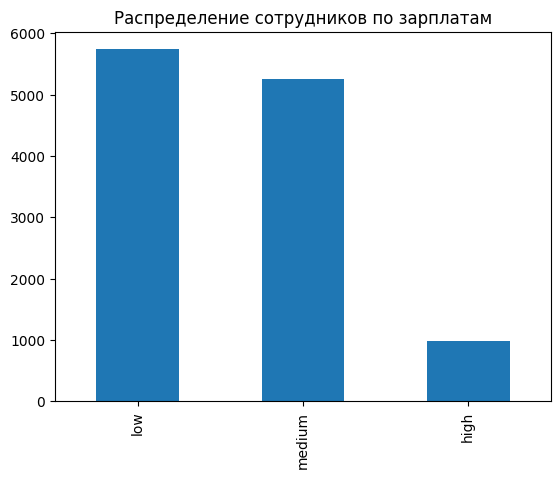

In [11]:
salaries = df['salary'].value_counts().sort_values(ascending=False)

salaries.plot(kind='bar',
                  title = 'Распределение сотрудников по зарплатам',
                  )

###Распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
tab_of_salary = pd.crosstab(df['salary'],df['department'])      
tab_of_salary

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,71,47,63,38,128,62,52,237,126,166
low,476,322,296,296,139,310,343,1553,867,1138
medium,429,325,262,267,169,301,291,1449,828,940


<Axes: xlabel='department', ylabel='salary'>

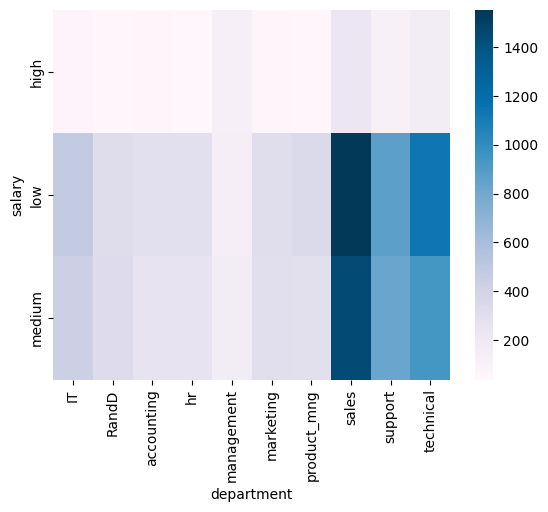

In [13]:
sns.heatmap(tab_of_salary, cmap='PuBu')         # визуализация распределения зарплат

###Корреляционная матрица для количественных переменных

In [14]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr().style.background_gradient(cmap="Blues")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000


###Две самые скоррелированные и две наименее скоррелированные переменные

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

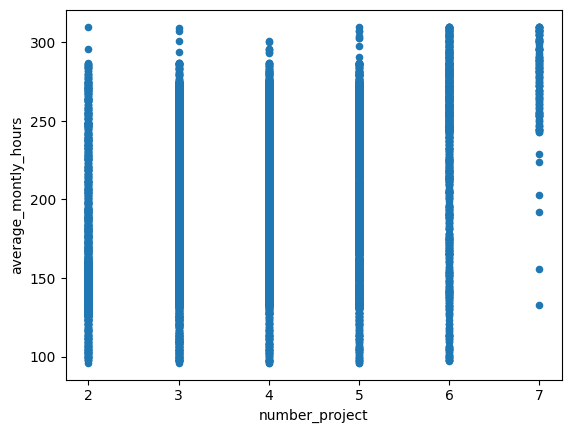

In [15]:
df.plot(kind='scatter', x = 'number_project', y = 'average_montly_hours')      # две наиболее скоррелированные переменные 

In [16]:
np.corrcoef(df['number_project'], df['average_montly_hours'])

array([[1.        , 0.33151637],
       [0.33151637, 1.        ]])

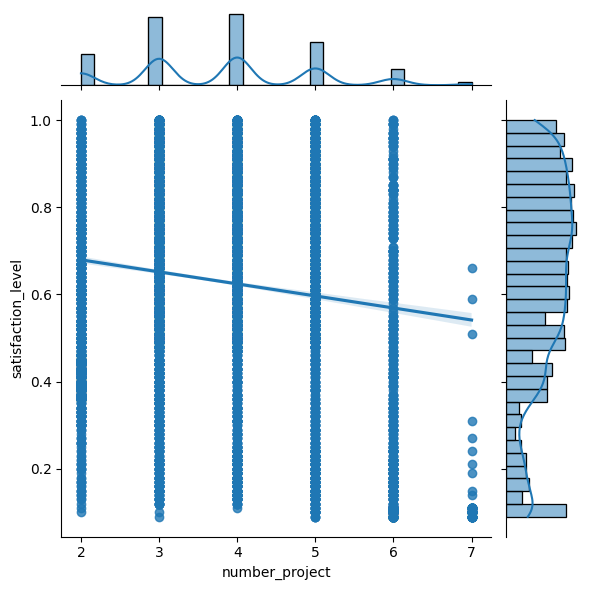

In [17]:
sns.jointplot(x='number_project', y='satisfaction_level', data=df, kind='reg')     # две наименее скоррелированные переменные

In [18]:
np.corrcoef(df['number_project'], df['satisfaction_level'])

array([[ 1.        , -0.13324628],
       [-0.13324628,  1.        ]])

###Доля сотрудников с повышением за последние 5 лет

In [19]:
df['left'].value_counts()           # кол-во уволившихся (1) и не уволившихся (0) сотрудников

0    10000
1     1991
Name: left, dtype: int64

In [20]:
promotion = df.iloc[0:, 6:8].loc[((df['left'] == 1) & (df['promotion_last_5years'] == 1))]          # уволивщиеся сотрудники
promotion


,left,promotion_last_5years
18,1,1
82,1,1
171,1,1
287,1,1
583,1,1
750,1,1
998,1,1
1660,1,1


In [70]:
percent = round((promotion['left'].count() / df['left'].count()), 3)          # доля уволившихся
percent

0.001

In [67]:
promotion2 = df.iloc[0:, 6:8].loc[((df['left'] == 0) & (df['promotion_last_5years'] == 1))]         # не уволивщиеся сотрудники
promotion2


,left,promotion_last_5years
4490,0,1
4491,0,1
4492,0,1
4493,0,1
4494,0,1
...,...,...
11985,0,1
11986,0,1
11987,0,1
11988,0,1


In [71]:
percent2 = round((promotion2['left'].count() / df['left'].count()), 3)      # доля не уволившихся
percent2

0.016

### Средняя степень удовлетворенности

In [24]:
satisfaction = df.iloc[0:, [0, 6]].loc[((df['left'] == 0))]           # не уволившиеся работники
satisfaction

,satisfaction_level,left
1991,0.58,0
1992,0.82,0
1993,0.45,0
1994,0.78,0
1995,0.49,0
...,...,...
11986,0.90,0
11987,0.74,0
11988,0.85,0
11989,0.33,0


In [25]:
satisfaction['satisfaction_level'].mean()

0.667365

In [26]:
satisfaction1 = df.iloc[0:, [0, 6]].loc[((df['left'] == 1))]          # уволившиеся работники
satisfaction1

,satisfaction_level,left
0,0.38,1
1,0.80,1
2,0.11,1
3,0.72,1
4,0.37,1
...,...,...
1986,0.37,1
1987,0.11,1
1988,0.41,1
1989,0.84,1


In [27]:
satisfaction1['satisfaction_level'].mean()

0.440271220492215

###Среднее количество проектов

In [28]:
projects = df.iloc[0:, [2, 6]].loc[((df['left'] == 0))]                 # не уволившиеся работники
projects

,number_project,left
1991,4,0
1992,2,0
1993,5,0
1994,5,0
1995,3,0
...,...,...
11986,3,0
11987,5,0
11988,3,0
11989,3,0


In [29]:
projects['number_project'].mean()

3.7868

In [30]:
projects1 = df.iloc[0:, [2, 6]].loc[((df['left'] == 1))]                # уволившиеся работники
projects1

,number_project,left
0,2,1
1,5,1
2,7,1
3,5,1
4,2,1
...,...,...
1986,2,1
1987,7,1
1988,2,1
1989,4,1


In [31]:
projects1['number_project'].mean()

3.8834756403817177

###модель LDA, предсказывающая уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df.iloc[:,[0,1,2,3,4,5,7]]
y = df['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [36]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
model.predict(x_test)    # коэф. для x

array([0.52566011, 0.14294101, 0.06744735, ..., 0.13036731, 0.52786205,
       0.09286798])

In [38]:
# model.intercept_  # коэф. для y

In [39]:
y_pred = model.predict(x_test)
y_pred

array([0.52566011, 0.14294101, 0.06744735, ..., 0.13036731, 0.52786205,
       0.09286798])

In [40]:
y_test

396      1
3098     0
9322     0
357      1
1323     1
        ..
10394    0
9317     0
3546     0
3527     0
11299    0
Name: left, Length: 3598, dtype: int64

In [41]:
model.score(x_test, y_test).round(2)  


0.17

Коэффициент детерминации - 0.17, это означает, что модель получилась хорошая

###Гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Гипотеза

H0 - проведенное на работе время одинаково для всех работников

In [46]:
print('Среднее количество рабочих часов сотрудников c низким окладом', df[df.salary == 'low']['average_montly_hours'].mean())
print('Среднее количество рабочих часов сотрудников с высоким окладом', df[df.salary == 'high']['average_montly_hours'].mean())

Среднее количество рабочих часов сотрудников c низким окладом 200.4391986062718
Среднее количество рабочих часов сотрудников с высоким окладом 200.06767676767677


In [48]:
import scipy.stats as st

high_salary = df[df['salary'] == 'low']['average_montly_hours'] 
low_salary = df[df['salary'] == 'high']['average_montly_hours']


In [52]:
stat, p = st.ttest_ind(high_salary, low_salary, equal_var = False)

print(f"Статистика = {stat:.5f}, p = {p:.10f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, проведенное на работе время одинаково для всех работников')
else:
    print('Отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')

Статистика = 0.22611, p = 0.8211495099
Не отклоняем нулевую гипотезу, проведенное на работе время одинаково для всех работников


Делаем вывод, что работники и с высоким и с низким окладом проводят на работе одинаковое кол-во времени